In [2]:
from keras.layers import Dense
from keras.models import Sequential


In [ ]:
for i in range(0, 21):
  	# Train model for 1 epoch
    h = model.fit(X_train, y_train, batch_size = 16, epochs = 1, verbose = 0)
    if i%4==0: 
      # Get the output of the first layer
      layer_output = inp_to_out([X_test])[0]
      
      # Evaluate model accuracy for this epoch
      test_accuracy = model.evaluate(X_test, y_test)[1] 
      
      # Plot 1st vs 2nd neuron output
      plot()

### autoencoder (mnist dataset)

In [3]:
# Start with a sequential model
autoencoder = Sequential()

# Add a dense layer with input the original image pixels and neurons the encoded representation
autoencoder.add(Dense(28, input_shape=(784, ), activation="relu"))

# Add an output layer with as many neurons as the orginal image pixels
autoencoder.add(Dense(784, activation = "sigmoid"))

# Compile your model with adadelta
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

# Summarize your model structure
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28)                21980     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               22736     
Total params: 44,716
Trainable params: 44,716
Non-trainable params: 0
_________________________________________________________________


### denoising

In [ ]:
# Build your encoder by using the first layer of your autoencoder
encoder = Sequential()
encoder.add(autoencoder.layers[0])

# Encode the noisy images and show the encodings for your favorite number [0-9]
encodings = encoder.predict(X_test_noise)
show_encodings(encodings, number = 1)

In [ ]:
# Build your encoder by using the first layer of your autoencoder
encoder = Sequential()
encoder.add(autoencoder.layers[0])

# Encode the noisy images and show the encodings for your favorite number [0-9]
encodings = encoder.predict(X_test_noise)
show_encodings(encodings, number = 1)

# Predict on the noisy images with your autoencoder
decoded_imgs = autoencoder.predict(X_test_noise)

# Plot noisy vs decoded images
compare_plot(X_test_noise, decoded_imgs)

### CNNS

Building a CNN model. 
(MNIST Dataset).

In [4]:
# Import the Conv2D and Flatten layers and instantiate model
from keras.layers import Conv2D,Flatten, Dense
model = Sequential()

# Add a convolutional layer of 32 filters of size 3x3
model.add(Conv2D(filters = 32, kernel_size = 3, input_shape = (28, 28, 1), activation = 'relu'))

# Add a convolutional layer of 16 filters of size 3x3
model.add(Conv2D(16, kernel_size = 3, activation = 'relu'))

# Flatten the previous layer output
model.add(Flatten())

# Add as many outputs as classes with softmax activation
model.add(Dense(10, activation = 'softmax'))

In [ ]:
# Obtain a reference to the outputs of the first layer
first_layer_output = model.layers[0].output

# Build a model using the model's input and the first layer output
first_layer_model = Model(inputs = model.layers[0].input, outputs = first_layer_output)

# Use this model to predict on X_test
activations = first_layer_model.predict(X_test)

# Plot the activations of first digit of X_test for the 15th filter
axs[0].matshow(activations[0,:,:,14], cmap = 'viridis')

# Do the same but for the 18th filter now
axs[1].matshow(activations[0,:,:,17], cmap = 'viridis')
plt.show()

In [12]:
# Import image and preprocess_input
import numpy as np
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

# Load the image with the right target size for your model
img = image.load_img('/content/dd.jpg', target_size=(224, 224))

# Turn it into an array
img_array = image.img_to_array(img)

# Expand the dimensions of the image, this is so that it fits the expected model input format
img_expanded = np.expand_dims(img_array, axis = 0)

# Pre-process the img in the same way original images were
img_ready = preprocess_input(img_expanded)

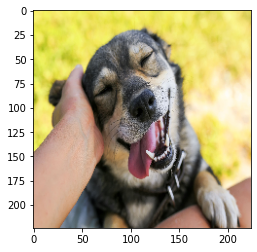

In [17]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [13]:
# Instantiate a ResNet50 model with 'imagenet' weights
from keras.applications.resnet50 import ResNet50, decode_predictions
model = ResNet50(weights='imagenet')

# Predict with ResNet50 on your already processed img
preds = model.predict(img_ready)

# Decode the first 3 predictions
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02111129', 'Leonberg', 0.26483098), ('n02106662', 'German_shepherd', 0.16093646), ('n02106550', 'Rottweiler', 0.106471464)]


### LSTM

Long short term memory networks. (A type of RNN - Recurrent Neural Networks).

In [18]:
# Split text into an array of words 
from keras.preprocessing.text import Tokenizer
text = 'it is not the strength of the body but the strength of the spirit it is useless to meet revenge with revenge it will heal nothing even the smallest person can change the course of history all we have to decide is what to do with the time that is given us the burned hand teaches best after that advice about fire goes to the heart'
words = text.split()

# Make sentences of 4 words each, moving one word at a time
sentences = []
for i in range(4, len(words)):
  sentences.append(' '.join(words[i-4:i]))

# Instantiate a Tokenizer, then fit it on the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

# Turn sentences into a sequence of numbers
sequences = tokenizer.texts_to_sequences(sentences)
print("Sentences: \n {} \n Sequences: \n {}".format(sentences[:5],sequences[:5]))

Sentences: 
 ['it is not the', 'is not the strength', 'not the strength of', 'the strength of the', 'strength of the body'] 
 Sequences: 
 [[5, 2, 42, 1], [2, 42, 1, 6], [42, 1, 6, 4], [1, 6, 4, 1], [6, 4, 1, 10]]


In [19]:
# Import the Embedding, LSTM and Dense layer
from keras.layers import Dense, Embedding, LSTM

model = Sequential()
vocab_size = len(tokenizer.index_word) + 1
# Add an Embedding layer with the right parameters
model.add(Embedding(input_dim = vocab_size, input_length = 3, output_dim = 8, ))

# Add a 32 unit LSTM layer
model.add(LSTM(32))

# Add a hidden Dense layer of 32 units and an output layer of vocab_size with softmax
model.add(Dense(32, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 3, 8)              352       
_________________________________________________________________
lstm (LSTM)                  (None, 32)                5248      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 44)                1452      
Total params: 8,108
Trainable params: 8,108
Non-trainable params: 0
_________________________________________________________________


In [20]:
def predict_text(test_text, model = model):
  if len(test_text.split()) != 3:
    print('Text input should be 3 words!')
    return False
  
  # Turn the test_text into a sequence of numbers
  test_seq = tokenizer.texts_to_sequences([test_text])
  test_seq = np.array(test_seq)
  
  # Use the model passed as a parameter to predict the next word
  pred = model.predict(test_seq).argmax(axis = 1)[0]
  
  # Return the word that maps to the prediction
  return tokenizer.index_word[pred]

In [21]:
predict_text('meet revenge with')

'with'

In [25]:
predict_text('the course need')

'with'

In [24]:
predict_text('strength of the')

'of'